# Performance analysis of string building with Python

In [32]:
import random
import statistics
import string
import timeit

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

#### Custom CSS

In [33]:
from IPython.display import HTML
from pathlib import Path

# load custom CSS for old-fashioned dataframe style
css_rules = Path('custom.css').read_text()
HTML('<style>' + css_rules + '</style>')

## Settings

In [39]:
NUM_EXEC_LOOPS = 10000
MAX_STRING_SIZE = 100
STRING_SIZE_STEP = 10
MILISECONDS = 1e3

STR_EXPRESSIONS = {
    'f-string': "f'{s} {t}'",
    'concat': "s + ' ' + t",
    'join': "''.join((s, t))",
    'modulus': "'%s %s' % (s, t)",
    'format': "'{} {}'.format(s, t)",
    'template': "string.Template('$s $t').substitute(s=s, t=t)",
}

In [40]:
def build_random_string(size):
    ''' Return a string with <size> randomized chars taken from ASCII letters'''
    return ''.join([random.choice(string.ascii_letters) for _ in range(size)])

## Data generation

In [55]:
data = []
string_size_range = range(0, MAX_STRING_SIZE + 1, STRING_SIZE_STEP)
for size in string_size_range:
    s = build_random_string(size)
    t = build_random_string(size)

    results = []
    for label, expr in STR_EXPRESSIONS.items():
        execution_times = timeit.repeat(f'r = {expr}', globals=globals(), number=NUM_EXEC_LOOPS)
        mean_execution_time = statistics.mean(execution_times) * MILISECONDS
        results.append(mean_execution_time)
    data.append(results)

#### Dataframe creation

In [56]:
df = pd.DataFrame(data, columns=STR_EXPRESSIONS.keys(), index=string_size_range)
df

,f-string,concat,join,modulus,format,template
0,1.551347,0.763269,1.563590,2.310731,3.303814,26.739637
10,1.094821,1.523566,1.705380,2.354047,3.418319,26.363795
20,1.089958,1.604446,1.814832,2.469088,3.562932,26.023307
30,1.101319,1.499564,1.691017,2.387098,3.430304,25.881604
40,1.116216,1.614920,1.830469,2.239271,3.298186,26.111271
50,1.122690,1.557970,1.715332,2.233320,3.311006,26.234807
60,1.103702,1.605938,1.805613,2.505218,3.627207,27.295736
70,1.129055,1.526609,1.709141,2.454844,3.533063,26.263642
80,1.118596,1.525626,2.065881,2.439323,3.549587,25.957036
90,1.270414,1.531847,1.713802,2.467834,3.547114,26.003031


## "Smooth" data with cubic interpolation

In [57]:
new_index = np.arange(0, df.index.max() + 1)
df_cubic = pd.DataFrame(index=new_index)
for column in df.columns:
    f = interp1d(df.index, df[column], kind='cubic')
    df_cubic[column] = f(df_cubic.index)

## Plot data

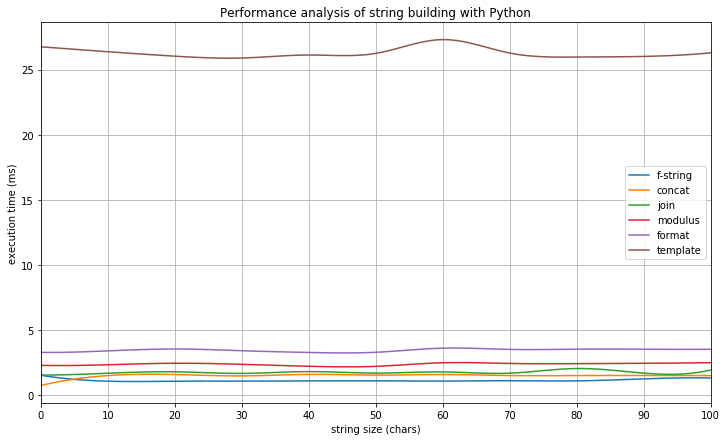

In [58]:
ax = df_cubic.plot(
    figsize=(12, 7),
    grid=True,
    xticks=df.index,
    title='Performance analysis of string building with Python'
)
ax.set_xlabel('string size (chars)')
ax.set_ylabel('execution time (ms)');

## Comparing mean values

In [68]:
mean_values = df.mean().sort_values()

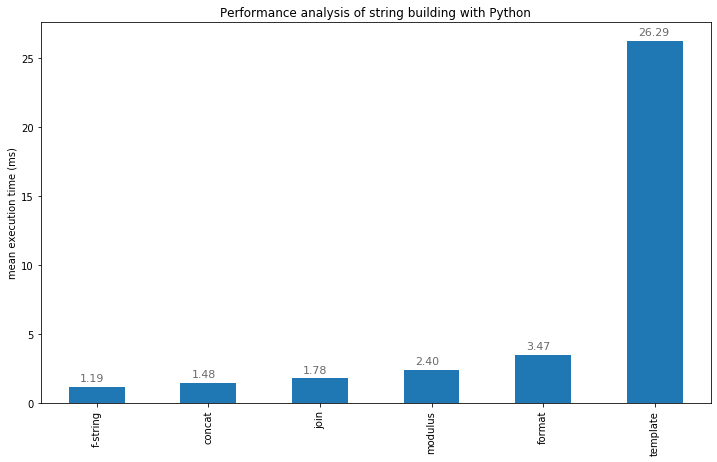

In [86]:
ax = mean_values.plot.bar(
    figsize=(12, 7),
    title='Performance analysis of string building with Python'
)
# show values above bars
for i in ax.patches:
    ax.text(i.get_x() + .1, i.get_height() + .4, 
            f'{i.get_height():.2f}', fontsize=11,
            color='dimgrey')
ax.set_ylabel('mean execution time (ms)');